## Intro
- This notebook performs a volatility and return analysis of key financial instruments using historical market data. The assets analyzed include:
    - AAPL (Apple Inc.)
    - BTC-USD (Bitcoin to USD)
    - GSPC (S&P 500 Index)
    - ETH (Ethereum)

### Objectives
1. Visualize price trends over time to identify market behavior and turning points.
2. Compute and plot log returns to understand daily asset fluctuations.
3. Compare volatility across different asset classes (stocks, indices, and cryptocurrencies).
4. Evaluate risk vs return using mean log returns and return dispersion.

### Tools & Concepts Used
1. Pandas & NumPy for data manipulation
2. Matplotlib for time series visualization
3. Log returns to assess price dynamics in a statistically robust manner
4. Volatility metrics to analyze risk patterns

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the 'src' folder to the path
sys.path.append(os.path.abspath('../src'))
from utils.preprocessing import load_and_prepare

from arch import arch_model


In [2]:
# Core assets loaded individually for clarity
aapl = load_and_prepare('../data/AAPL.csv')
btc = load_and_prepare('../data/BTC-USD.csv')
gspc = load_and_prepare('../data/GSPC.csv')
eth = load_and_prepare('../data/ETH.csv')

# Store in a dictionary for easy group operations
assets = {
    'AAPL': aapl,
    'BTC-USD': btc, 
    'GSPC': gspc,
    'ETH': eth
}
# Now you can use individual variables or the dictionary as needed

In [3]:
## Debugging the datasets
# Debug your data structure directly
print("Dataset Analysis:")
print("-" * 50)

for name, df in assets.items():
    print(f"\nAsset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Index type: {type(df.index)}")
    print(f"First few rows:")
    print(df.head(3))
    print("-" * 30)

Dataset Analysis:
--------------------------------------------------

Asset: AAPL
Shape: (2614, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                price  log_return
Date                             
2015-01-05  23.604324   -0.028577
2015-01-06  23.606562    0.000095
2015-01-07  23.937572    0.013925
------------------------------

Asset: BTC-USD
Shape: (3811, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                 price  log_return
Date                              
2015-01-02  315.032013    0.002489
2015-01-03  281.082001   -0.114028
2015-01-04  264.195007   -0.061959
------------------------------

Asset: GSPC
Shape: (2622, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                  price  log_return
Date                               
2015-01-05  20

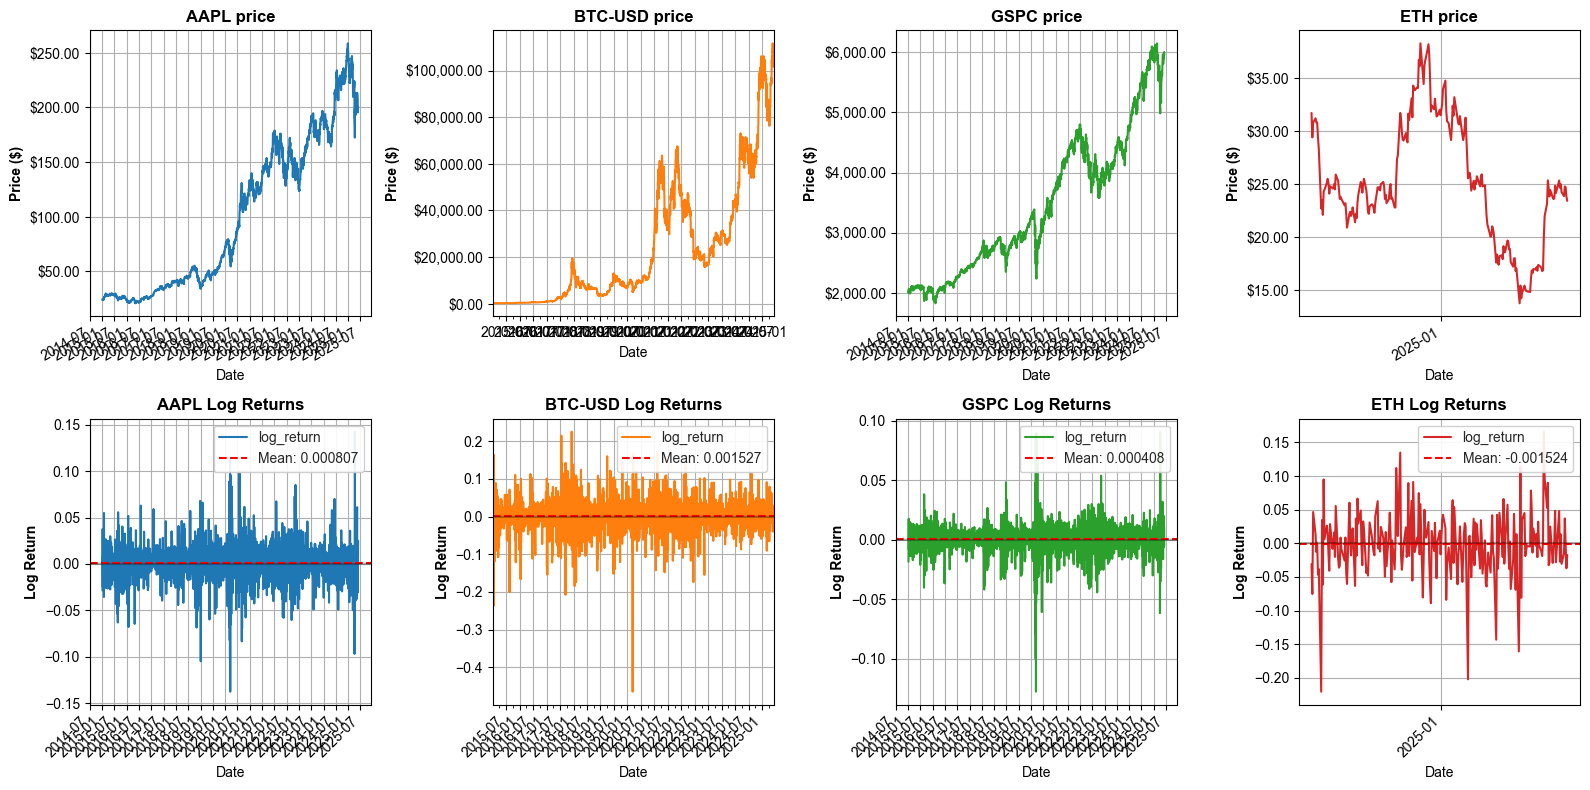

In [4]:
 # Plot all data
from utils.plots import plot_prices_and_returns

fig = plot_prices_and_returns(assets, figsize=(16, 8))
plt.show()

### Summary
#### Price Analysis (Top Row):
1. AAPL (Apple): Shows remarkable growth from around $25 in 2015 to peaks above $250 by 2024, representing roughly 10x growth over the period. The trajectory shows consistent upward momentum with some volatility spikes.
2. BTC-USD (Bitcoin): Exhibits the most dramatic price swings, starting near zero and reaching peaks around $100,000. The chart captures Bitcoin's notorious boom-bust cycles, with major rallies followed by significant corrections.
3. GSPC (S&P 500): Demonstrates steady long-term growth from about $2,000 to over $6,000, reflecting the broader U.S. stock market's performance. The growth is more measured compared to individual stocks or crypto.
4. ETH (Ethereum): Shows extreme volatility with prices ranging from around $15 to peaks above $35. The timeframe appears shorter (2024-2025) and captures significant price swings typical of cryptocurrency markets.

#### Volatility Analysis (Bottom Row - Log Returns):
- The log returns reveal important risk characteristics:

1. AAPL: Relatively stable with mean return of 0.000807, showing occasional volatility spikes but generally contained fluctuations
2. BTC-USD: Highest volatility with mean return of 0.001540, displaying frequent large swings between +20% and -40% daily moves
3. GSPC: Most stable with mean return of 0.000404, reflecting the diversified nature of the index with smaller daily fluctuations
4. ETH: High volatility with negative mean return of -0.001208, showing the risky nature of cryptocurrency investments

#### Key Insights:
1. Risk-Return Tradeoff: Cryptocurrencies (BTC, ETH) show higher potential returns but with significantly higher volatility
2. Traditional Assets: AAPL and S&P 500 show more predictable growth patterns with lower day-to-day volatility
3. Time Horizons: Different assets are shown over different periods, with crypto assets showing shorter but more volatile timeframes
4. Mean Returns: All assets except ETH show positive average daily returns, though ETH's negative mean may reflect a specific challenging period


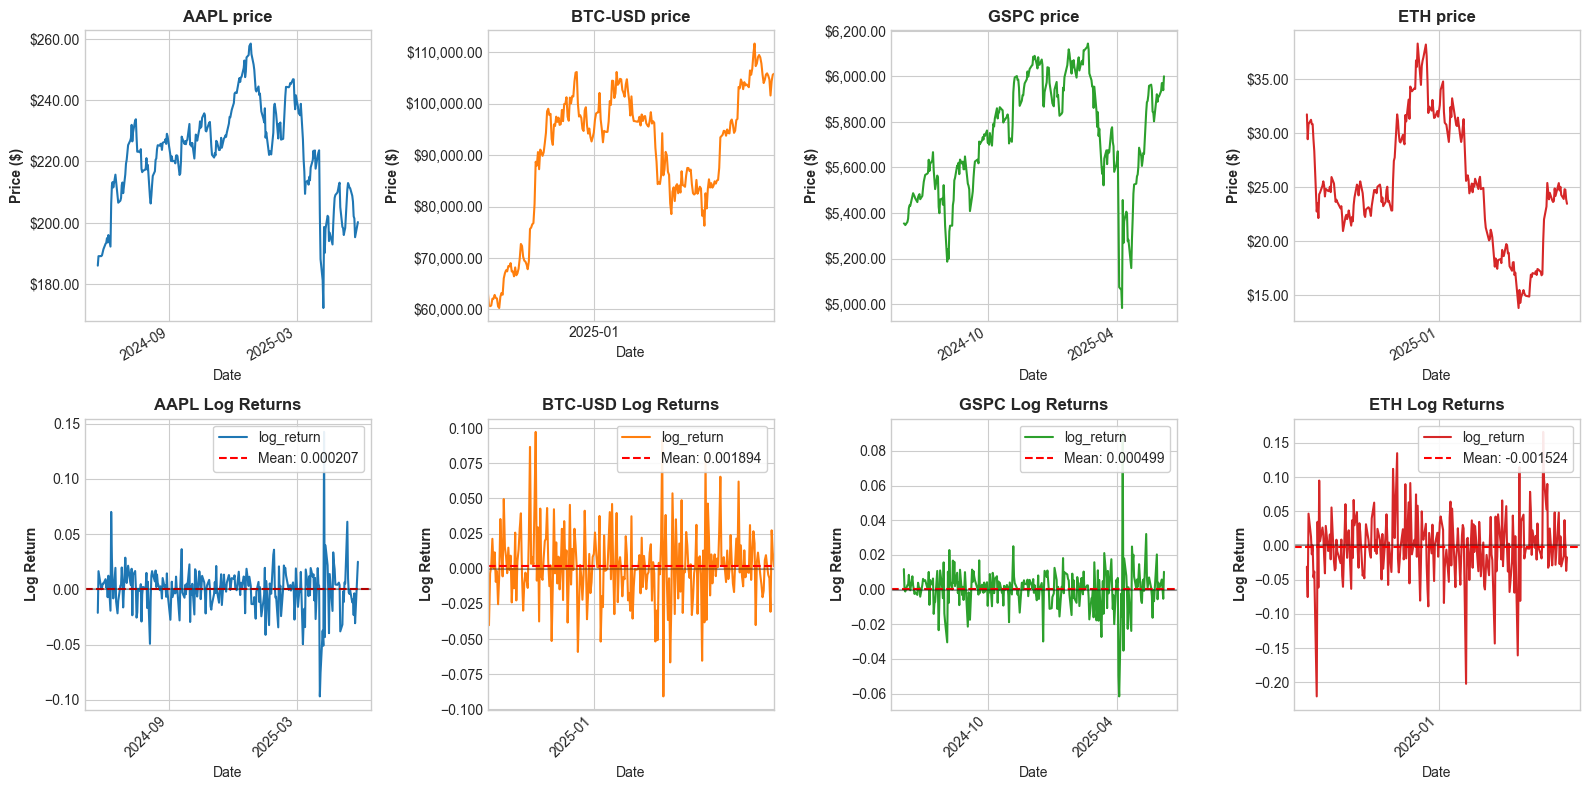

In [6]:
# Plot just the most recent year (approximately 252 trading days)
fig = plot_prices_and_returns(assets, figsize=(16, 8), recent_days=252)
plt.show()

### Short-Term View (Recent 1-Year Period)
#### Price Trends
1. AAPL: Fairly volatile with significant drops in early 2025. Peaks near $260.
2. BTC-USD: Strong rally from $60,000 to over $110,000, followed by corrections.
3. GSPC: Moderate upward trend with a sharp correction near early 2025.
4. ETH: Rose to ~$36, then dropped sharply to ~$16, before stabilizing around $25.

#### Log Returns
- Mean Return Observations:
    - AAPL: ~0.000207 → low but positive return.
    - BTC: ~0.001894 → relatively high average return.
    - GSPC: ~0.000499 → steady but conservative.
    - ETH: ~-0.001524 → negative mean return indicates underperformance.

#### Volatility:
- BTC and ETH show higher spikes and dips, suggesting more volatility.
- GSPC and AAPL have relatively smoother return paths.